Estimate the Quantum Harmonic Oscillator with the piecewise function:
$$\[V(x) = \begin{cases}
\alpha x && x > 0 \\
-\alpha x && \text{otherwise} \end{cases}\]$$

over the domain $[-a, a]$

$\alpha$ is to be chosen such that the linear function matches the quadratic H.O.

1.) Write the dimless problem and solve with box basis

$$-\frac{\hbar^2}{2m}\nabla^2\Psi(x) + V(x)\Psi(x) = E\Psi(x)$$  
$$\nabla^2\Psi(x) -\frac{2m}{\hbar^2}V(x)\Psi(x) +\frac{2m}{\hbar^2} E\Psi(x) = 0$$
$$\nabla^2\Psi(x)  + \bigg(\frac{2m}{\hbar^2} E - \frac{2m}{\hbar^2}V(x)\bigg)\Psi(x) = 0$$

Plug in the potential where $\alpha$ has units of force:

$$\nabla^2\Psi(x)  + \bigg(\frac{2m}{\hbar^2} E - \frac{2m}{\hbar^2}\alpha x\bigg)\Psi(x) = 0$$

Factor out $m\omega/\hbar$:

$$\frac{1}{\frac{m\omega}{\hbar}}\frac{\partial^2}{\partial x^2}\Psi(x)  + \bigg(\frac{\hbar}{m\omega}\frac{2m}{\hbar^2} E - \frac{\hbar}{m\omega}\frac{2m}{\hbar^2}\alpha x\bigg)\Psi(x) = 0$$

$$\frac{1}{\frac{m\omega}{\hbar}}\frac{\partial^2}{\partial x^2}\Psi(x)  + \bigg(\frac{1}{\omega}\frac{2}{\hbar} E - \frac{1}{\omega}\frac{2}{\hbar}\alpha x\bigg)\Psi(x) = 0$$

$$\frac{1}{\frac{m\omega}{\hbar}}\frac{\partial^2}{\partial x^2}\Psi(x)  + \bigg(\frac{2E}{\omega\hbar} - \frac{2\alpha x}{\omega\hbar}\bigg)\Psi(x) = 0$$

let dimless units $\xi = \sqrt{\frac{m\omega}{\hbar}}x$ and $\epsilon = \frac{E}{\hbar\omega}:$

$$\frac{\partial^2}{\partial \xi^2}\Psi(\xi)  + \bigg(2\epsilon - \frac{2\alpha x}{\omega\hbar}\bigg)\Psi(\xi) = 0$$

Here, we choose $\alpha$ such that the units match with energy. $\alpha = \frac{m\omega^2a}{2}$, where $a$ has units of meters and corresponds to the intersection of the linear potential to the quadratic.

$$\frac{\partial^2}{\partial \xi^2}\Psi(\xi)  + \bigg(2\epsilon - \frac{m\omega^2a}{2}\frac{2x}{\omega\hbar}\bigg)\Psi(\xi) = 0$$
$$\frac{\partial^2}{\partial \xi^2}\Psi(\xi)  + \bigg(2\epsilon - \frac{m\omega}{\hbar}ax\bigg)\Psi(\xi) = 0$$
$$\frac{\partial^2}{\partial \xi^2}\Psi(\xi)  + \bigg(2\epsilon - \frac{m\omega}{\hbar}a(\xi\sqrt{\frac{\hbar}{m\omega}})\bigg)\Psi(\xi) = 0$$
$$\frac{\partial^2}{\partial \xi^2}\Psi(\xi)  + \bigg(2\epsilon - \sqrt{\frac{m\omega}{\hbar}}a\xi\bigg)\Psi(\xi) = 0$$

Now the function is dimensionless. Finally, one can set the values of $m$, $\hbar$, and $\omega$ to be 1 for simplicity.

$$\[V(\xi) = \begin{cases}
a\xi  && \xi > 0 \\
-a\xi  && \text{otherwise} \end{cases}\]$$

$$\frac{\partial^2}{\partial \xi^2}\Psi(\xi)  + \bigg(2\epsilon - a\xi\bigg)\Psi(\xi) = 0$$


b.) plot shown
c.) plot shown
d.) the approximation matches the shape of the theoretical oscillator, aside from the phase shift in 2 of the graphs, the results are slightly off compared to the oscillator. 

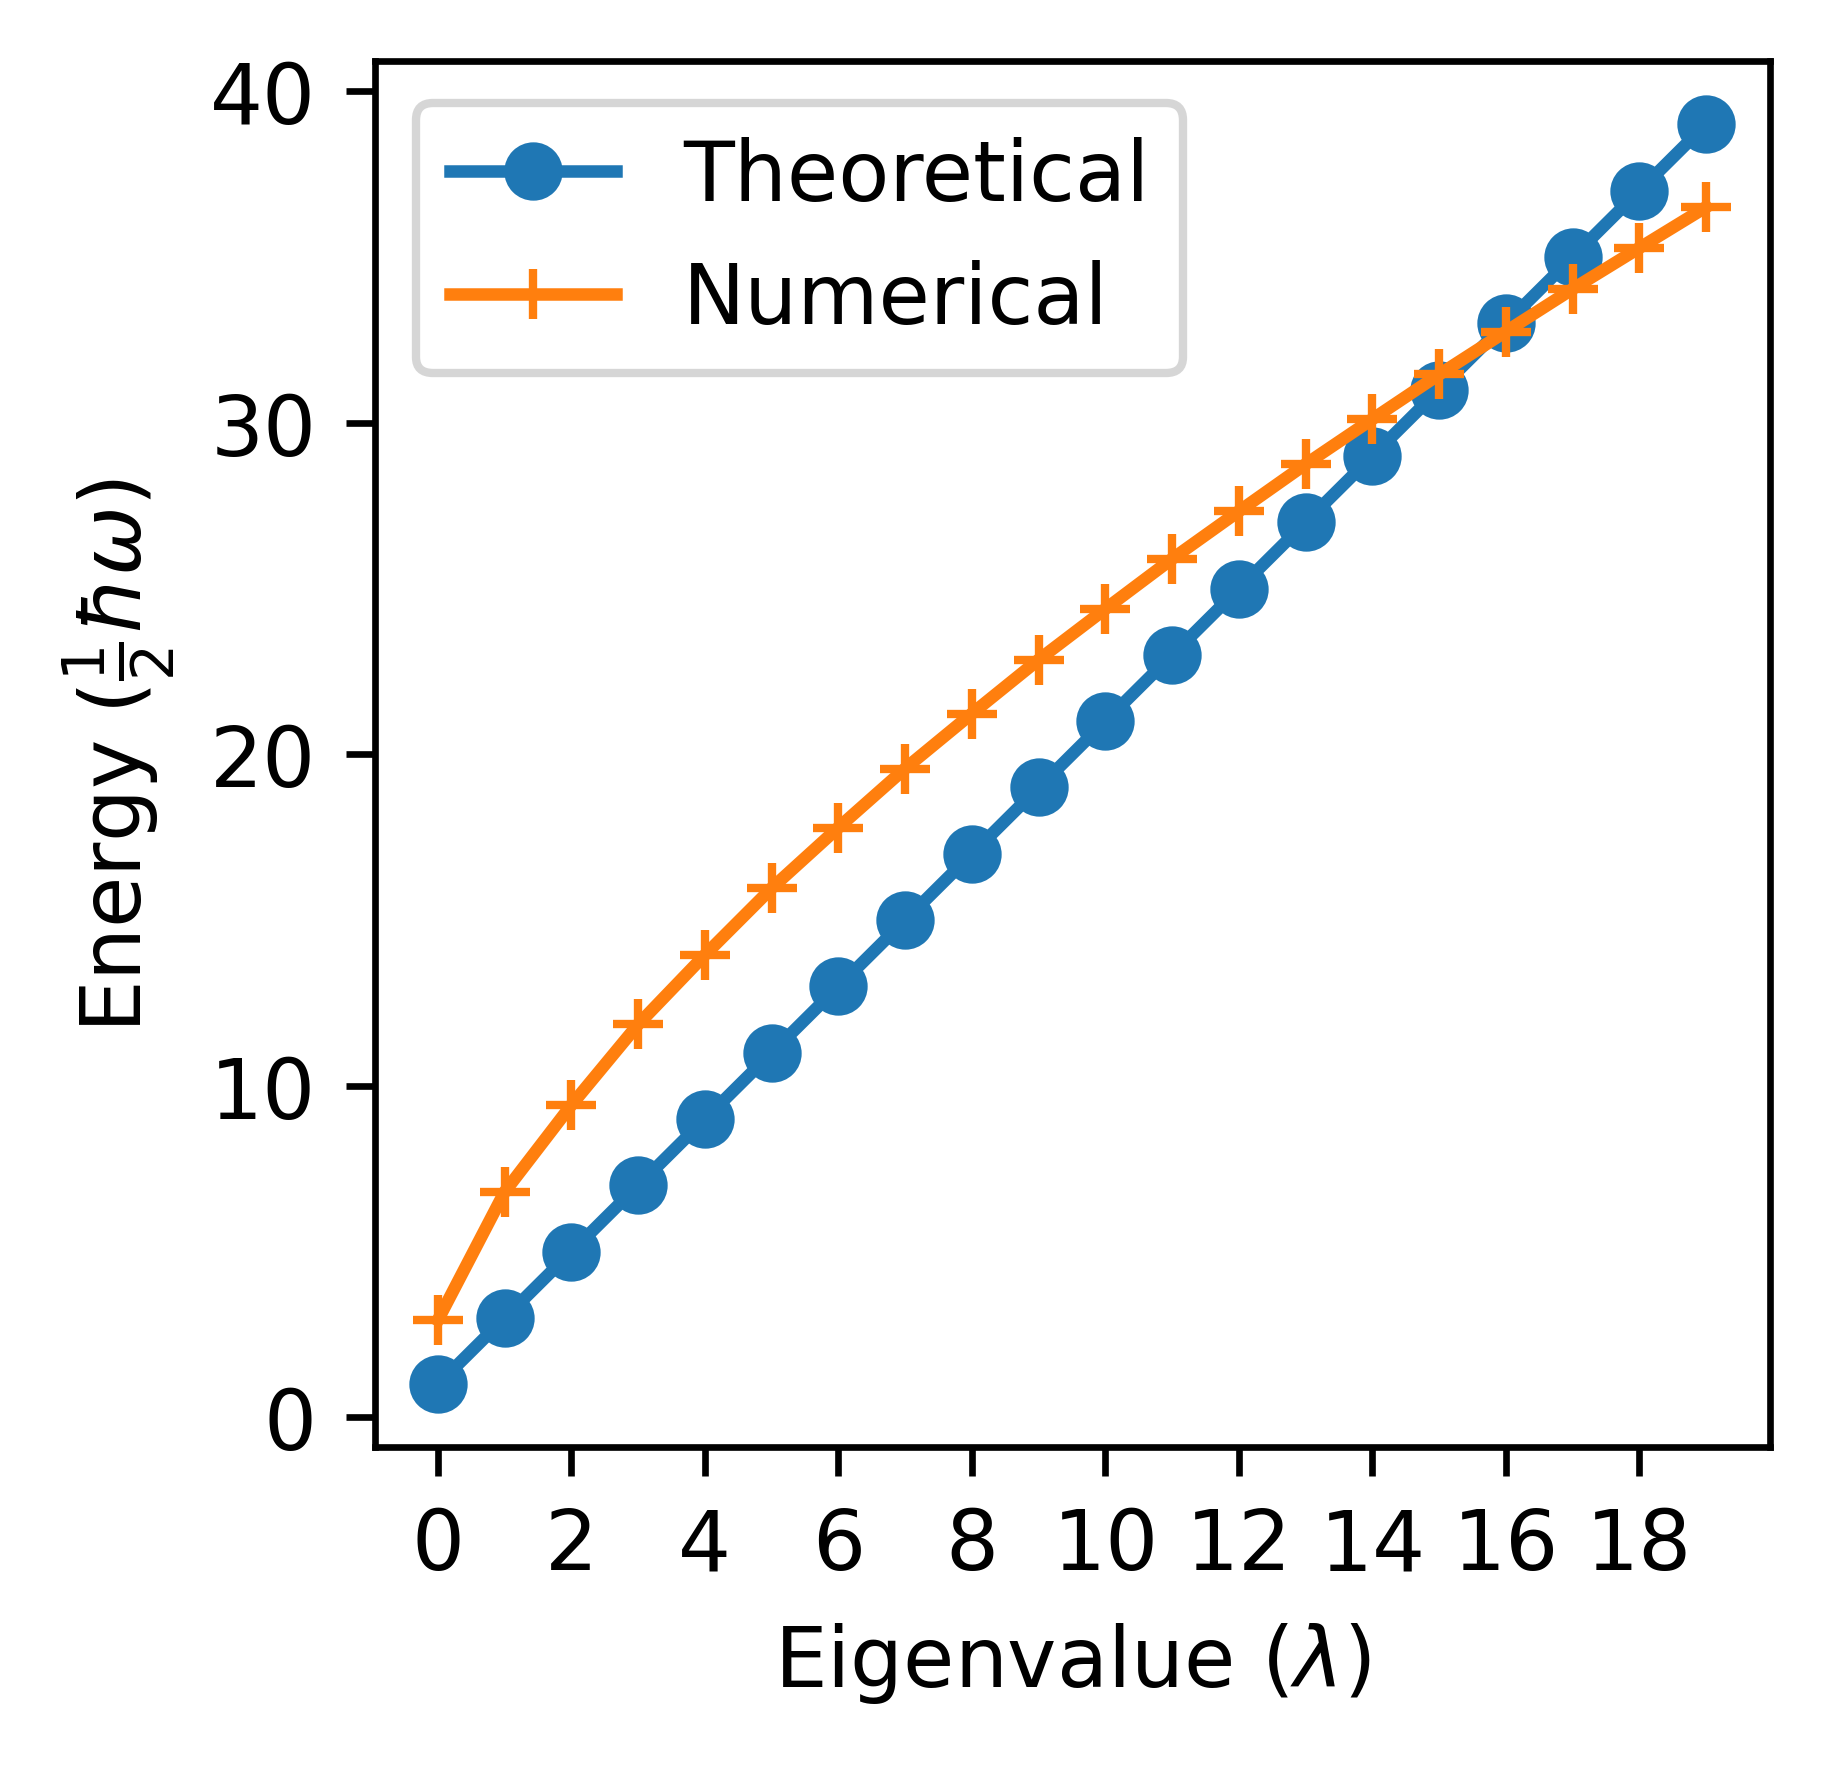

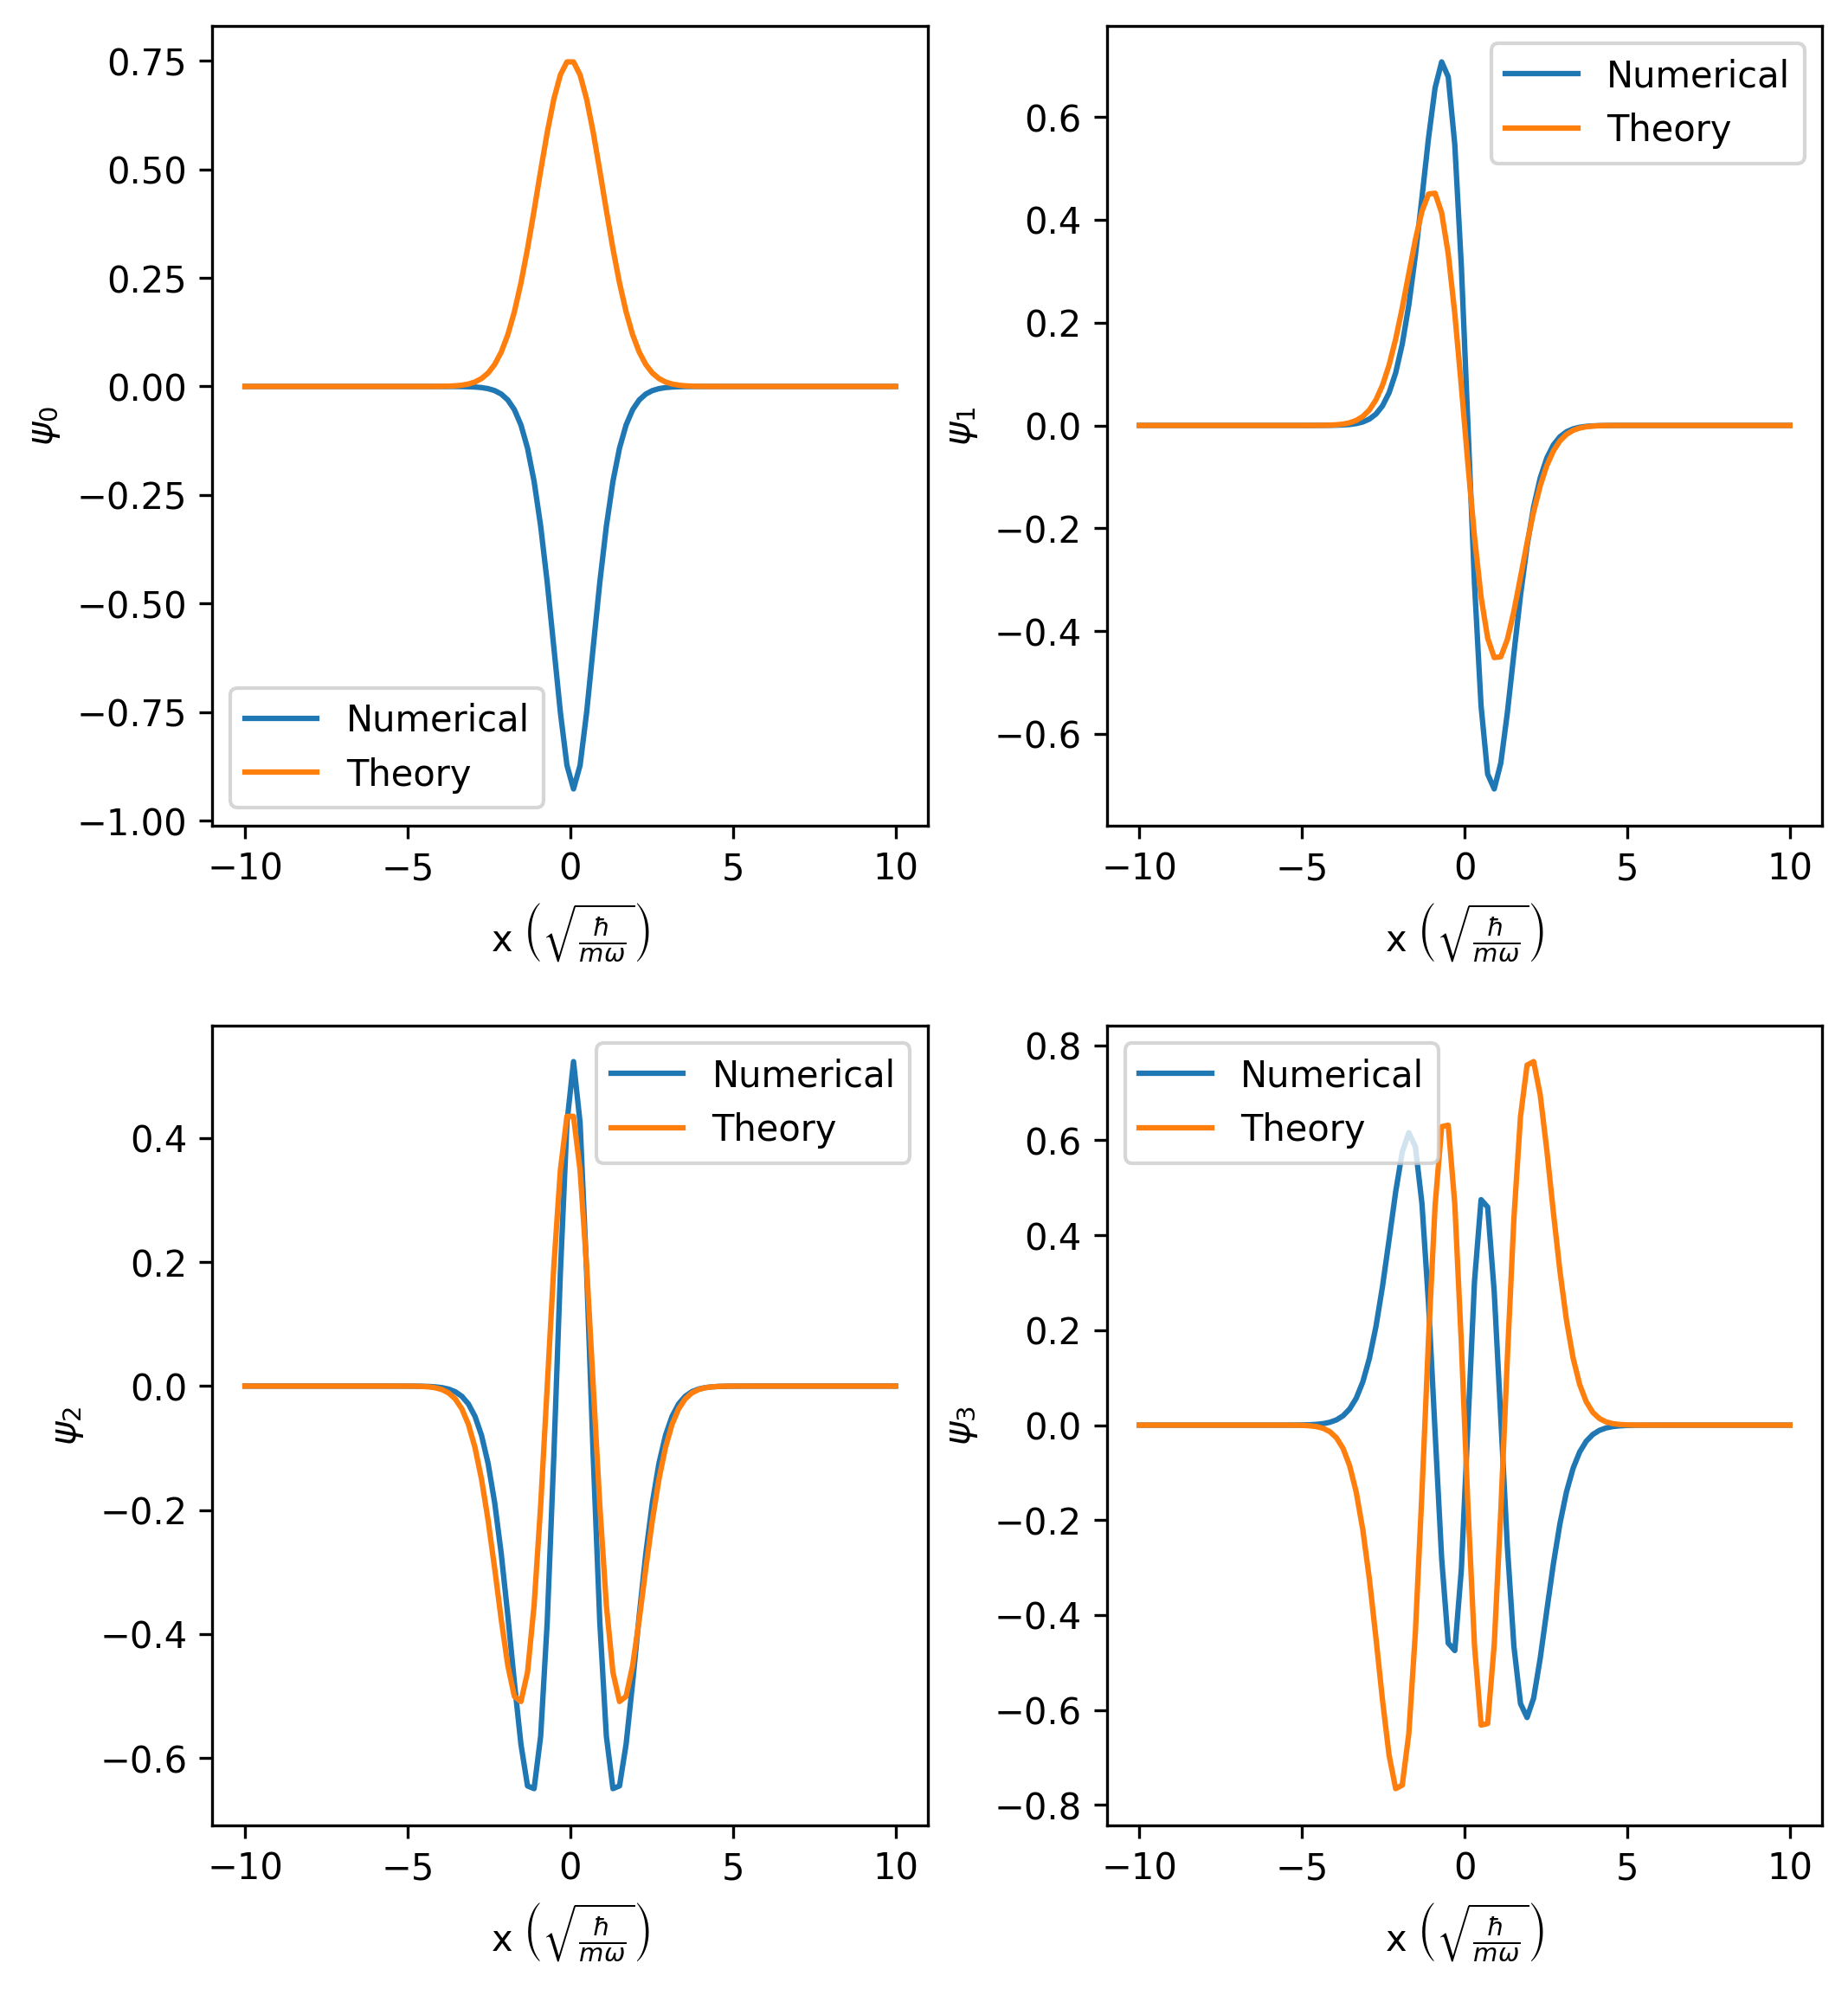

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as lin

def Quantum_1D(xmin, xmax, no_pts, potential, param=None):
    domain = (xmax - xmin) / no_pts
    d_squared = domain*domain
    matrix = np.zeros((no_pts, no_pts))
    i = 0
    x = xmin + i*domain
    if param == None:
        matrix[i][i] = 2.0 / d_squared + potential(x)
    else:
        matrix[i][i] = 2.0/d_squared + potential(x, param)
    matrix[i][i+1] = -1.0 / domain**2

    for i in range(1, no_pts - 1):
        x = xmin + i * domain
        matrix[i][i-1] = -1.0 / d_squared
        if param == None:
            matrix[i][i] = 2.0 / d_squared + potential(x)
        else:
            matrix[i][i] = 2.0 / d_squared + potential(x, param)

        matrix[i][i+1] = -1.0 / domain**2

    i = no_pts - 1
    x = xmin + i * domain
    if param == None:
        matrix[i][i] = 2.0 / d_squared + potential(x)
    else:
        matrix[i][i] = 2.0 / d_squared + potential(x, param)

    matrix[i][i - 1] = -1.0 / d_squared

    #eigen
    value, vector = lin.eig(matrix)
    indices = np.argsort(value)

    energy = []
    states = []
    for index in indices:
        try:
            energy.append(value[index])
        except NameError:
            energy = [value[index]]

        try:
            states.append(vector[:, index] / np.sqrt(domain))
        except NameError:
            states = [vector[:, index] / np.sqrt(domain)]
    return energy, states

a = 10
no_pts = 100
x = np.linspace(-a, a, no_pts)
alpha = a/2 # mw^2a/2 where m = w = 1

absolute = lambda x: alpha * np.abs(x)
        
"""
for i in x: # for each point
    pos_x_values = []
    pos_x_vectors = []
    neg_x_values = []
    neg_x_vectors = []
    if i > 0:
        # get values for x > 0 
        potential = lambda i: alpha * i
        value_pos, vector_pos = Quantum_1D(-a, a, no_pts, potential)
        print(f'value pos {value_pos}')
        pos_x_values.append(value_pos)
        pos_x_vectors.append(vector_pos)

    else:
        # gets values for x < 0
        potential = lambda i: -alpha * i
        value_neg, vector_neg = Quantum_1D(-a, a, no_pts, potential)
        print(f'value neg {value_neg}')
        #print(f'neg val{value_neg}, neg vec{vector_neg}')

        neg_x_values.append(value_neg)
        neg_x_vectors.append(vector_neg)
"""

value, vector = Quantum_1D(-a, a, no_pts, absolute)

print(f'Eigenvalues: {value}, Eigenvectors: {vector}') #n of values = n of vectors
NN = [i for i in range(20)] # gives 0 - 19 values
theory = [(2 * i + 1) for i in NN]
numerical = [value[i] for i in NN] 

fig = plt.figure(figsize=(3, 3), dpi=300)
plt.plot(NN, theory, marker='o', label='Theoretical')
plt.plot(NN, numerical, marker='+', label='Numerical')
plt.xticks(np.arange(0, len(NN), step=2))
plt.xlabel(r'Eigenvalue ($\lambda$)')
plt.ylabel(r'Energy ($\frac{1}{2}\hbar\omega$)')
plt.legend()
plt.gcf().set_dpi(600)
plt.show()

theory0 = [(np.pi) ** -0.25 * np.exp(-xx * xx / 2) for xx in x]
theory1 = [(np.pi) ** -0.25 * np.exp(-xx * xx / 2) * (-xx) for xx in x]
theory2 = [(8 * np.pi) ** -0.25 * np.exp(-xx * xx / 2) * (-2 * xx * xx + 1) for xx in x]
theory3 = [(8 * 6 * np.pi) ** -0.25 * np.exp(-xx * xx / 2) * (4 * xx * xx * xx - 6 * xx) for xx in x]

fig = plt.figure(figsize=(8, 9), dpi=300)
gs = fig.add_gridspec(2, 2, hspace=0.25, wspace=0.25)
(ax0, ax1), (ax2, ax3) = gs.subplots()

ax0.plot(x, vector[0], label='Numerical') # fix this to piecewise 
ax0.plot(x, theory0, label='Theory')
ax0.set_xlabel(r'x $\left(\sqrt{\frac{\hbar}{m \omega}}\right)$')
ax0.set_ylabel(r'$\psi_0$')
ax0.legend()

ax1.plot(x, vector[1], label='Numerical')
ax1.plot(x, theory1, label='Theory')
ax1.set_xlabel(r'x $\left(\sqrt{\frac{\hbar}{m \omega}}\right)$')
ax1.set_ylabel(r'$\psi_1$')
ax1.legend()

ax2.plot(x, vector[2], label='Numerical')
ax2.plot(x, theory2, label='Theory')
ax2.set_xlabel(r'x $\left(\sqrt{\frac{\hbar}{m \omega}}\right)$')
ax2.set_ylabel(r'$\psi_2$')
ax2.legend()

ax3.plot(x, vector[3], label='Numerical')
ax3.plot(x, theory3, label='Theory')
ax3.set_xlabel(r'x $\left(\sqrt{\frac{\hbar}{m \omega}}\right)$')
ax3.set_ylabel(r'$\psi_3$')
ax3.legend()

plt.show()


Eigenvalue 0 = values: 1.8726993284246076, vectors: [-1.30652457e-05 -2.75189744e-05 -4.48284298e-05 -6.66777951e-05
 -9.51131266e-05 -1.32705285e-04 -1.82741617e-04 -2.49457325e-04
 -3.38318111e-04 -4.56366617e-04 -6.12646326e-04 -8.18717645e-04
 -1.08928181e-03 -1.44292878e-03 -1.90302495e-03 -2.49875542e-03
 -3.26633282e-03 -4.25037991e-03 -5.50548651e-03 -7.09793082e-03
 -9.10754186e-03 -1.16296617e-02 -1.47771434e-02 -1.86822936e-02
 -2.34986355e-02 -2.94023299e-02 -3.65930527e-02 -4.52940808e-02
 -5.57512966e-02 -6.82307796e-02 -8.30146211e-02 -1.00394579e-01
 -1.20663192e-01 -1.44101989e-01 -1.70966523e-01 -2.01468030e-01
 -2.35751697e-01 -2.73871754e-01 -3.15763847e-01 -3.61215549e-01
 -4.09836197e-01 -4.61027751e-01 -5.13958765e-01 -5.67544052e-01
 -6.20432967e-01 -6.71009532e-01 -7.17407725e-01 -7.57545105e-01
 -7.89177532e-01 -8.09976924e-01 -8.17632827e-01 -8.09976924e-01
 -7.89177532e-01 -7.57545105e-01 -7.17407724e-01 -6.71009530e-01
 -6.20432965e-01 -5.67544050e-01 -5.13

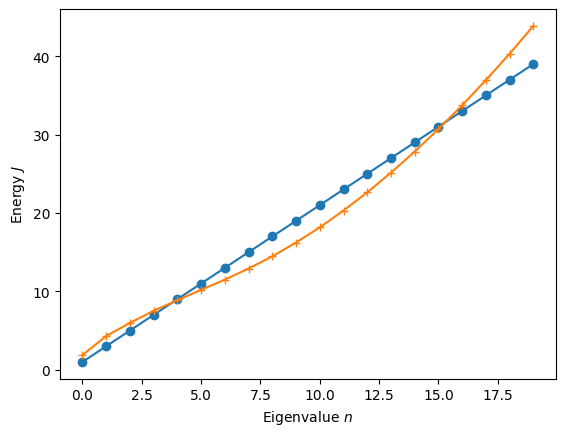

In [30]:
def Quantum_HO(xmin, xmax, no_pts, potential, param=None):
    # psi'' + (2e - axi)psi' = 0
    
    #domain size from -a to a. with box basis of N points
    domain = (xmax - xmin) / no_pts
    d_squared = domain*domain
    matrix = np.zeros((no_pts, no_pts))
    
    #initialize matrix value
    i = 0
    x = xmin + i*domain
    if param == None:
        matrix[i][i] = 2.0 / d_squared + potential(x) # element [0][0]
    else:
        matrix[i][i] = 2.0/d_squared + potential(x, param)
    matrix[i][i+1] = -1.0 / domain**2 # element [0][1]

    for i in range(1, no_pts - 1): # points from 1 to N-1
        x = xmin + i * domain
        matrix[i][i-1] = -1.0 / d_squared # element [0][i-1]
        if param == None:
            matrix[i][i] = 2.0 / d_squared + potential(x)
        else:
            matrix[i][i] = 2.0 / d_squared + potential(x, param)

        matrix[i][i+1] = -1.0 / domain**2

    i = no_pts - 1
    x = xmin + i * domain
    if param == None:
        matrix[i][i] = 2.0 / d_squared + potential(x)
    else:
        matrix[i][i] = 2.0 / d_squared + potential(x, param)

    matrix[i][i - 1] = -1.0 / d_squared

    #eigen
    value, vector = lin.eig(matrix)
    indices = np.argsort(value)

    energy = []
    states = []
    for index in indices:
        try:
            energy.append(value[index])
        except NameError:
            energy = [value[index]]

        try:
            states.append(vector[:, index] / np.sqrt(domain))
        except NameError:
            states = [vector[:, index] / np.sqrt(domain)]
    return energy, states

a = 5
no_pts = 100
x = np.linspace(-a, a, no_pts)
potential = lambda x: a/2 * np.abs(x)

values, vectors = Quantum_HO(-a, a, no_pts, potential)
for i in range(20):
    print(f'Eigenvalue {i} = values: {values[i]}, vectors: {vectors[i]}')


NN = [i for i in range(20)]
theory = [(2 * i + 1) for i in NN]
numerical = [values[i] for i in NN]
plt.plot(NN, theory, marker="o", label="Theoretical" )
plt.plot(NN, numerical, marker="+", label="Numerical")
plt.xlabel(r'Eigenvalue $n$')
plt.ylabel(r'Energy $J$')
plt.show()

